/Users/adachiharuto/prog/S_P/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8 ) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


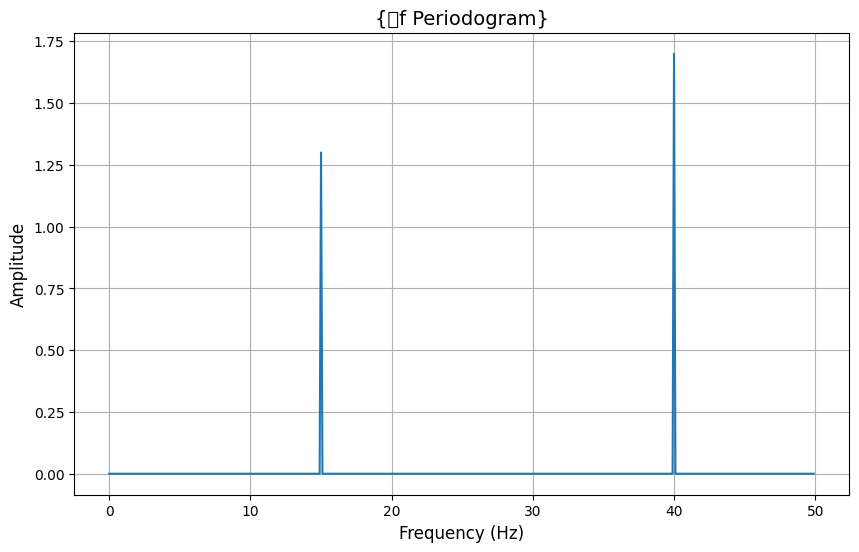

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
fs = 100  # サンプリング周波数 (Hz)
t = np.arange(0, 10, 1/fs)  # 時間軸 (10秒間)

# 信号の生成
x = (1.3) * np.sin(2 * np.pi * 15 * t) + (1.7) * np.sin(2 * np.pi * 40 * (t - 2))

# FFTの計算
N = len(x)  # サンプリング数
X = np.fft.fft(x)  # FFT
frequencies = np.fft.fftfreq(N, d=1/fs)  # 周波数軸
amplitudes = np.abs(X) / (N / 2)  # 振幅（スケーリング）

# 正の周波数成分のみを抽出
positive_frequencies = frequencies[:N // 2]
positive_amplitudes = amplitudes[:N // 2]

# プロット
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_amplitudes)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title('{\bf Periodogram}', fontsize=14)
plt.grid(True)
plt.show()


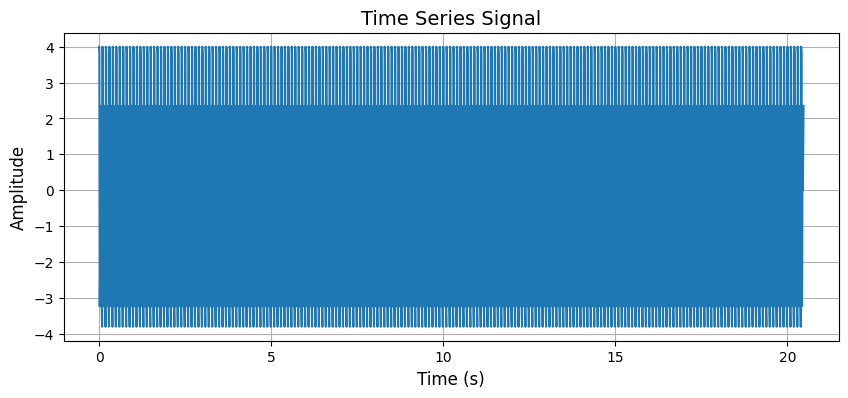

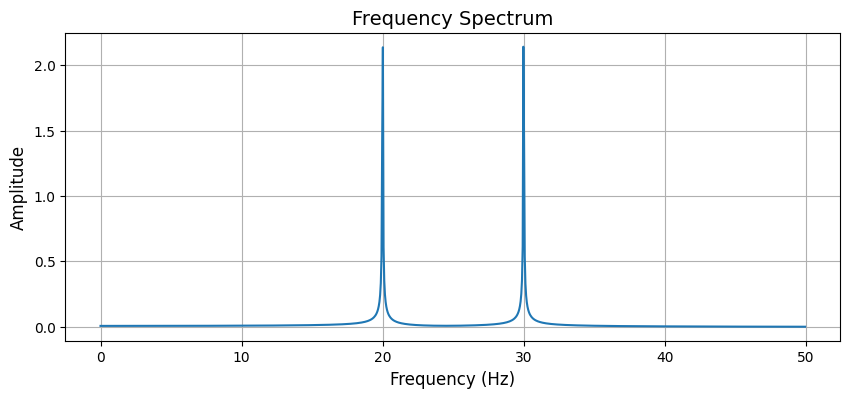

In [2]:
# ファイル読み込み
file_name = "data01.dat"
data = np.loadtxt(file_name)  # 時系列データを読み込む

# サンプリング周波数
fs = 100  # サンプリング周波数 (Hz)
N = len(data)  # サンプル数
t = np.arange(N) / fs  # 時間軸

# 時系列信号のプロット
plt.figure(figsize=(10, 4))
plt.plot(t, data)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.title("Time Series Signal", fontsize=14)
plt.grid(True)
plt.show()

# FFTの計算
X = np.fft.fft(data)  # FFT
frequencies = np.fft.fftfreq(N, d=1/fs)  # 周波数軸
amplitudes = np.abs(X) / (N / 2)  # 振幅スケーリング

# 正の周波数成分のみを抽出
positive_frequencies = frequencies[:N // 2]
positive_amplitudes = amplitudes[:N // 2]

# 周波数成分のプロット
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, positive_amplitudes)
plt.xlabel("Frequency (Hz)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.title("Frequency Spectrum", fontsize=14)
plt.grid(True)
plt.show()


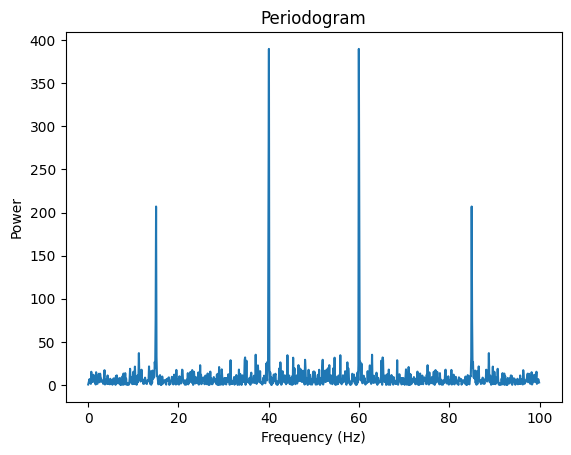

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sample frequency (Hz)
fs = 100
# 10 sec sample
t = np.arange(0, 10, 1/fs)

# Generate signal
x = (1.3) * np.sin(2 * np.pi * 15 * t) + \
    (1.7) * np.sin(2 * np.pi * 40 * (t - 2)) + \
    2.5 * np.random.randn(len(t))  # Gaussian noise

# Window length
m = len(x)
# Transform length (next power of 2)
n = 2**np.ceil(np.log2(m)).astype(int)
# Compute DFT
y = np.fft.fft(x, n)
# Frequency range
f = np.arange(n) * (fs / n)
# Power of the DFT
power = (y * np.conj(y)) / n

# Plot periodogram
plt.plot(f, power.real)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Periodogram')
plt.show()


#考察
15Hzと40Hzにピークが表れ，その後fs/2=50Hzよりそれ以降の周波数はエイリアシングにより対称なピークが表れていると考えられる．また，ノイズにより各周波数に若干のピークが見らる．